# Hackathon: "Prediction on patient readmission to the hospital"

### Problem Statement:
    
Management of lifestyle diseases in hospitalized patients has a significant bearing on 
outcome, in terms of both morbidity and mortality. The main object for this problem is to 
predict whether a patient is likely to be readmitted to hospital based on the previous details of 
the patient.

### Dataset Description:

- Target attribute: "readmitted" (discrete variable: 2 classes).
- The dataset contains 48 features and 66587 rows in train dataset and 16647 data in test dataset. The Column readmission is the target dataset.

### Importing necessary Libraries:

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("Train-1617360447408-1660719685476.csv")      ## Loading the dataset

In [3]:
df.shape               ## checking the shape of the dataset

(66587, 49)

In [4]:
df.head()               ## checking first 5 columns of the dataset

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


### Data cleaning:

In [6]:
### Checking for duplicate values in the dataset.

df.duplicated().sum()

17676

In [7]:
## dropping the duplicates values.

df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(48911, 49)

In [11]:
## Checking for null values in the dataset.

df.isnull().sum()

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
weight                0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21             

In [12]:
df.describe()

,index,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,readmitted
count,48911.000000,4.891100e+04,4.891100e+04,48911.000000,48911.000000,48911.000000,48911.000000,48911.000000,48911.000000,48911.000000,48911.000000,48911.000000,48911.000000
mean,50897.807078,1.652508e+08,5.427235e+07,4.402486,43.110302,1.334465,16.032488,0.368895,0.205128,0.637096,49.831580,7.423770,0.462248
std,29444.352632,1.028397e+08,3.870114e+07,2.986656,19.626326,1.707151,8.139802,1.231869,0.934525,1.257994,28.857683,1.933264,0.498578
min,0.000000,1.573800e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000283,1.000000,0.000000
25%,25234.000000,8.454446e+07,2.340417e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,24.908012,6.000000,0.000000
50%,51029.000000,1.526470e+08,4.535182e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,49.728831,8.000000,0.000000
75%,76368.500000,2.304537e+08,8.735458e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,74.819023,9.000000,1.000000
max,101765.000000,4.438672e+08,1.893494e+08,14.000000,129.000000,6.000000,81.000000,39.000000,63.000000,19.000000,99.995810,16.000000,1.000000


In [14]:
## dropping columns which are very important for our furthur process.

df1=df.drop(['index','encounter_id','patient_id','weight'],axis=1)

In [15]:
df1.head()

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,Hispanic,Male,[80-90),4,Emergency/Trauma,39,1,9,1,1,...,No,No,No,No,No,No,No,No,Yes,1
1,Caucasian,Male,[60-70),3,Emergency/Trauma,34,1,12,0,0,...,No,No,No,No,No,No,No,No,No,0
2,Caucasian,Female,[50-60),6,Nephrology,50,2,24,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,AfricanAmerican,Female,[70-80),5,?,63,0,14,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[70-80),9,Psychiatry,17,1,11,0,0,...,No,No,No,No,No,No,No,No,No,1


In [16]:
df1.shape

(48911, 45)

### Data visualization

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distrinution of Readmission')

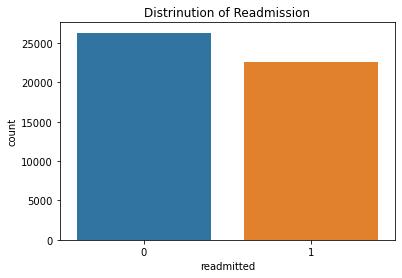

In [65]:
# Distribution of Readmission 
sns.countplot(df['readmitted']).set_title('Distrinution of Readmission')

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

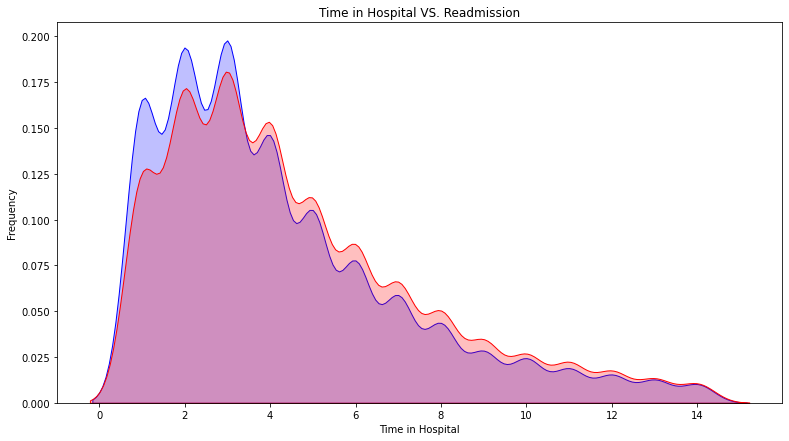

In [66]:
## Time in Hospital and Readmission

fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

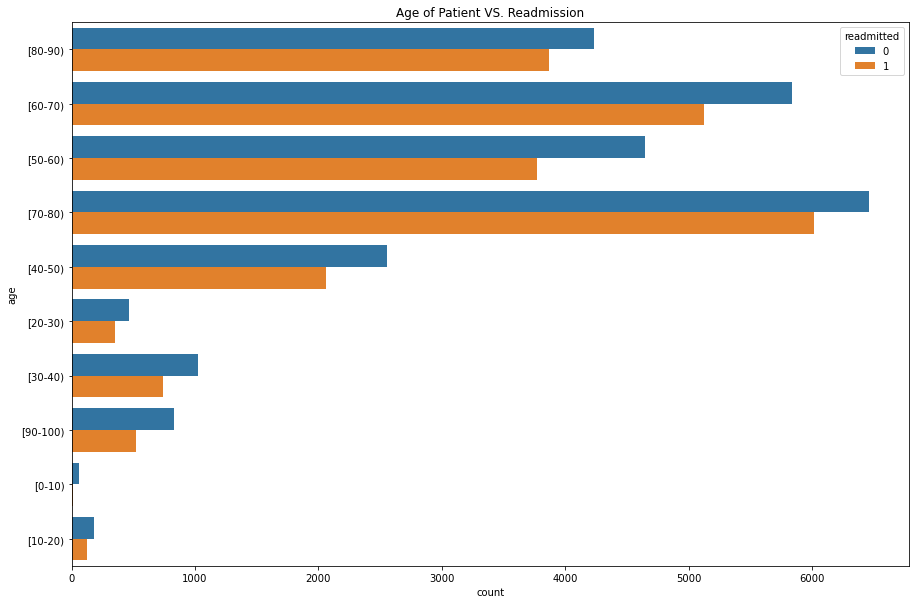

In [67]:
## Age and Readmission

fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

array([[<AxesSubplot:title={'center':'time_in_hospital'}>,
        <AxesSubplot:title={'center':'num_lab_procedures'}>,
        <AxesSubplot:title={'center':'num_procedures'}>],
       [<AxesSubplot:title={'center':'num_medications'}>,
        <AxesSubplot:title={'center':'number_outpatient'}>,
        <AxesSubplot:title={'center':'number_emergency'}>],
       [<AxesSubplot:title={'center':'number_inpatient'}>,
        <AxesSubplot:title={'center':'diag_5'}>,
        <AxesSubplot:title={'center':'number_diagnoses'}>],
       [<AxesSubplot:title={'center':'readmitted'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 720x720 with 0 Axes>

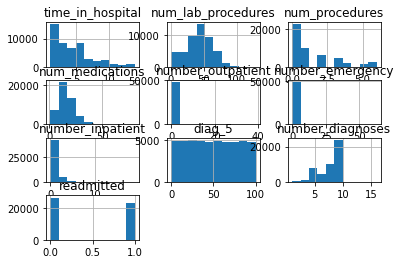

In [17]:
df1.hist()

<AxesSubplot:xlabel='count', ylabel='race'>

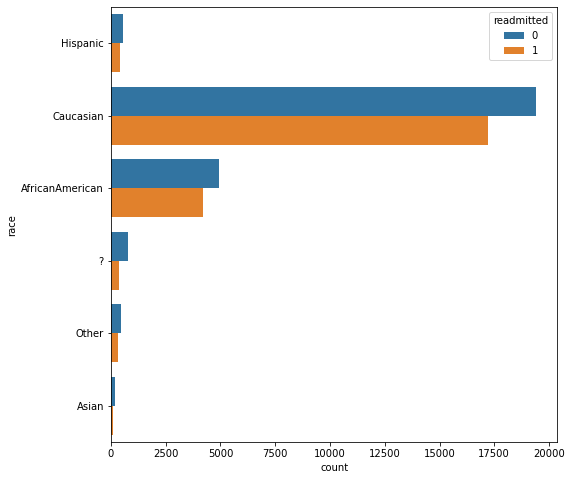

In [68]:
## Ethnicity of patient and Readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

### Gender and Readmission
- Male = 1
- Female = 0

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

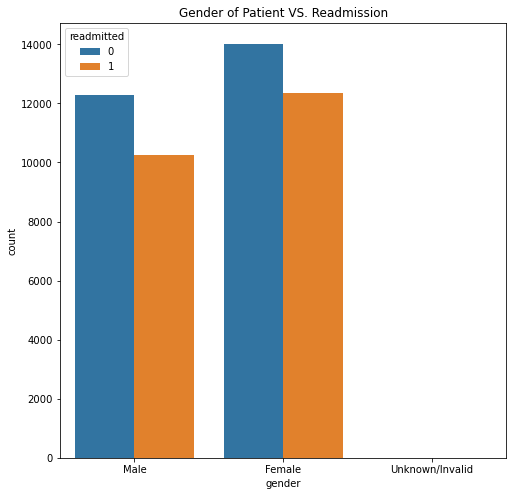

In [69]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

In [1124]:
df1.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2',
       'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13',
       'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23',
       'X24', 'X25', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [1125]:
df1.duplicated().sum()  ## checking duplicate values

17676

In [1126]:
df1=df1.drop_duplicates()  ## dropping duplicate values

In [1127]:
df1.shape

(48911, 45)

In [18]:
df1.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2',
       'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13',
       'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23',
       'X24', 'X25', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [19]:
## checking the value count of each features.


for col in df1.columns:
    print(df1[col].value_counts())

Caucasian          36637
AfricanAmerican     9136
?                   1114
Hispanic             970
Other                754
Asian                300
Name: race, dtype: int64
Female             26378
Male               22531
Unknown/Invalid        2
Name: gender, dtype: int64
[70-80)     12478
[60-70)     10964
[50-60)      8421
[80-90)      8103
[40-50)      4619
[30-40)      1766
[90-100)     1353
[20-30)       817
[10-20)       313
[0-10)         77
Name: age, dtype: int64
3     8584
2     8262
1     6764
4     6689
5     4823
6     3656
7     2780
8     2096
9     1390
10    1143
11     920
12     738
13     585
14     481
Name: time_in_hospital, dtype: int64
?                                 23983
InternalMedicine                   6977
Emergency/Trauma                   3642
Family/GeneralPractice             3636
Cardiology                         2551
                                  ...  
Speech                                1
Proctology                            1
Psychiat

In [20]:
## replcing '?' with null value

df1.replace("?",np.nan,inplace=True)

In [21]:
df1.isnull().sum()

race                   1114
gender                    0
age                       0
time_in_hospital          0
medical_specialty     23983
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                   11
diag_2                  172
diag_3                  685
diag_4                  685
diag_5                    0
number_diagnoses          0
X1                        0
X2                        0
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                       0
X16                       0
X17                       0
X18                       0
X19                 

In [22]:
#replacing the null with mode.

df1['race']=df1['race'].fillna(df1['race'].mode()[0])

In [23]:
#df1['medical_specialty']=df1['medical_specialty'].fillna(df1['medical_specialty'].mode()[0df])

df1.drop(['medical_specialty'],axis=1,inplace=True)

In [24]:
df1.isnull().sum().sum()

1553

In [25]:
df1['diag_3']=df1['diag_3'].fillna(df1['diag_3'].mode()[0])

In [26]:
df1['diag_4']=df1['diag_4'].fillna(df1['diag_4'].mode()[0])

In [27]:
df1=df1.dropna(axis=0)

In [28]:

df1.isnull().sum().sum()

0

In [29]:
df1.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,Hispanic,Male,[80-90),4,39,1,9,1,1,4,...,No,No,No,No,No,No,No,No,Yes,1
1,Caucasian,Male,[60-70),3,34,1,12,0,0,0,...,No,No,No,No,No,No,No,No,No,0
2,Caucasian,Female,[50-60),6,50,2,24,0,0,5,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,AfricanAmerican,Female,[70-80),5,63,0,14,0,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[70-80),9,17,1,11,0,0,0,...,No,No,No,No,No,No,No,No,No,1


In [30]:
df1.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,readmitted
count,48729.000000,48729.000000,48729.000000,48729.000000,48729.000000,48729.000000,48729.000000,48729.000000,48729.000000,48729.000000
mean,4.407765,43.109852,1.337725,16.057543,0.369841,0.205524,0.638285,49.852937,7.440436,0.462846
std,2.988745,19.640402,1.708628,8.136720,1.233766,0.935608,1.259314,28.855028,1.911626,0.498623
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000283,2.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,24.954927,6.000000,0.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,49.760821,8.000000,0.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,74.831931,9.000000,1.000000
max,14.000000,129.000000,6.000000,81.000000,39.000000,63.000000,19.000000,99.995810,16.000000,1.000000


In [31]:
df1.shape

(48729, 44)

In [32]:
## # Detecting Outliers:

df.shape

(48911, 49)

In [33]:
ot_columns=['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient',
           'number_emergency','number_inpatient','diag_5','number_diagnoses']

In [34]:
for col in ot_columns:

    q1=np.percentile(df1[col],25) 
    q3=np.percentile(df1[col],75)

    IQR=q3-q1
    
    print('Outliers for :',col,'\n')
    print(q1,q3,IQR)

#detecting upper bounds
    upper=q3+1.5*IQR
    print('Upper',upper)

    up=df1[col]>=upper
    print(np.where(up))


#detectiong lower bounds
    lower=q1-1.5*IQR
    print('lower',lower)

    lw=df1[col]<=lower
    print(np.where(lw),'\n')

Outliers for : time_in_hospital 

2.0 6.0 4.0
Upper 12.0
(array([    8,    30,    46, ..., 48511, 48545, 48674], dtype=int64),)
lower -4.0
(array([], dtype=int64),) 

Outliers for : num_lab_procedures 

31.0 57.0 26.0
Upper 96.0
(array([ 1333,  3072,  3550,  3570,  4163,  4497,  6095,  6527,  6608,
        8373,  8700,  8784,  9464,  9499, 10948, 11212, 11411, 12013,
       12378, 12835, 12879, 13683, 14289, 14540, 15335, 15852, 16913,
       17066, 17687, 17870, 18215, 18896, 19116, 19154, 19745, 19765,
       19858, 20130, 22356, 22388, 22722, 23587, 25308, 25697, 26000,
       26241, 26420, 26887, 28685, 29736, 30220, 30928, 30968, 32828,
       33341, 33816, 34144, 34502, 35430, 35505, 35915, 36409, 37113,
       37303, 37826, 37851, 38513, 38579, 38627, 38852, 41392, 43038,
       43639, 43871, 45349, 45753, 46051, 46429, 46703, 47464, 48546,
       48619], dtype=int64),)
lower -8.0
(array([], dtype=int64),) 

Outliers for : num_procedures 

0.0 2.0 2.0
Upper 5.0
(array([    8,   

In [35]:
out_columns=['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses']

In [36]:
for col in out_columns:
    tenth_percentile=np.percentile(df1[col],10)
    ninetieth_percentile=np.percentile(df1[col],90)
    print(tenth_percentile,ninetieth_percentile)
    df1[col]=np.where(df1[col]<tenth_percentile,tenth_percentile,df1[col]) 
    df1[col]=np.where(df1[col]>ninetieth_percentile,ninetieth_percentile,df1[col])

1.0 9.0
14.0 67.0
0.0 4.0
7.0 26.0
5.0 9.0


In [37]:
df1

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,Hispanic,Male,[80-90),4.0,39.0,1.0,9.0,1,1,4,...,No,No,No,No,No,No,No,No,Yes,1
1,Caucasian,Male,[60-70),3.0,34.0,1.0,12.0,0,0,0,...,No,No,No,No,No,No,No,No,No,0
2,Caucasian,Female,[50-60),6.0,50.0,2.0,24.0,0,0,5,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,AfricanAmerican,Female,[70-80),5.0,63.0,0.0,14.0,0,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[70-80),9.0,17.0,1.0,11.0,0,0,0,...,No,No,No,No,No,No,No,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,Caucasian,Female,[70-80),9.0,40.0,4.0,26.0,0,0,0,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,Caucasian,Male,[80-90),4.0,39.0,1.0,7.0,0,0,0,...,No,No,No,No,No,No,No,No,No,1
66584,Caucasian,Female,[60-70),2.0,24.0,1.0,13.0,0,0,2,...,No,No,No,No,No,No,No,No,Yes,1
66585,Caucasian,Female,[80-90),4.0,39.0,1.0,14.0,0,0,0,...,No,No,No,No,No,No,No,No,No,0


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48729 entries, 0 to 66586
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   race                48729 non-null  object 
 1   gender              48729 non-null  object 
 2   age                 48729 non-null  object 
 3   time_in_hospital    48729 non-null  float64
 4   num_lab_procedures  48729 non-null  float64
 5   num_procedures      48729 non-null  float64
 6   num_medications     48729 non-null  float64
 7   number_outpatient   48729 non-null  int64  
 8   number_emergency    48729 non-null  int64  
 9   number_inpatient    48729 non-null  int64  
 10  diag_1              48729 non-null  object 
 11  diag_2              48729 non-null  object 
 12  diag_3              48729 non-null  object 
 13  diag_4              48729 non-null  object 
 14  diag_5              48729 non-null  float64
 15  number_diagnoses    48729 non-null  float64
 16  X1  

### Converting categorical to numerical

In [39]:
cat_col=['race','gender','age','diag_1','diag_2','diag_3','diag_4','X1', 'X2',
       'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13',
       'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23',
       'X24', 'X25', 'change', 'diabetesMed']

In [40]:
from sklearn.preprocessing import LabelEncoder   
le = LabelEncoder()

for col in cat_col:
    df1[col]= le.fit_transform(df1[col])

In [41]:
df1.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,3,1,8,4.0,39.0,1.0,9.0,1,1,4,...,0,1,1,0,0,0,0,1,1,1
1,2,1,6,3.0,34.0,1.0,12.0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
2,2,0,5,6.0,50.0,2.0,24.0,0,0,5,...,0,0,1,0,0,0,0,0,1,1
3,0,0,7,5.0,63.0,0.0,14.0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,2,1,7,9.0,17.0,1.0,11.0,0,0,0,...,0,1,1,0,0,0,0,1,0,1


In [1156]:
#df1.to_csv('cleaned_data_full.csv')

### scaling the data

In [47]:
X=df1.drop(['readmitted'],axis=1)

In [48]:
X.shape

(48729, 43)

In [49]:
y=df1['readmitted']

In [50]:
y.shape

(48729,)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = scaled_data

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

### Creating ml model

In [53]:
#fitting logistic regression

from sklearn.linear_model import LogisticRegression
logis=LogisticRegression()

In [54]:
logis.fit(X_train, y_train)

LogisticRegression()

In [56]:
## Doing prediction on test data and checking F1 score of logistic regression.

from sklearn.metrics import classification_report

log_pred = logis.predict(X_test)

print(classification_report(y_test, log_pred))                     

              precision    recall  f1-score   support

           0       0.61      0.81      0.69      5235
           1       0.64      0.40      0.49      4511

    accuracy                           0.62      9746
   macro avg       0.62      0.60      0.59      9746
weighted avg       0.62      0.62      0.60      9746



In [58]:
## Using Random Forest Alogorithm
from sklearn.tree import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
rf_pred = rf_model.predict(X_test)

print(classification_report(y_test, rf_pred)) 

              precision    recall  f1-score   support

           0       0.63      0.74      0.68      5235
           1       0.62      0.50      0.55      4511

    accuracy                           0.63      9746
   macro avg       0.63      0.62      0.62      9746
weighted avg       0.63      0.63      0.62      9746



In [60]:
from xgboost import XGBClassifier

## Using XGBoost algorithm.

xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [61]:
## Doing prediction on test data and checking F1 score of Randon Forest algorithm.

xg_pred = xg_model.predict(X_test)

print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.64      0.72      0.67      5235
           1       0.61      0.53      0.57      4511

    accuracy                           0.63      9746
   macro avg       0.63      0.62      0.62      9746
weighted avg       0.63      0.63      0.62      9746



## Testing Data:
Loading the testing data after preprocessing and using the model to predict the target values.

In [1254]:
Test_file=pd.read_csv('test2.csv')   ## loading test file

In [1255]:
#in x_test variable we take our training dataset

x_test=Test_file.drop(['Unnamed: 0','encounter_id'],axis=1)

In [1256]:
## using the best model for prediction ( XG boost)

y_pred= xg_model.predict(x_test)

In [1257]:
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [1258]:
enconter=Test_file['encounter_id']

### Creating csv file for predicted

In [1259]:
df4=pd.DataFrame({'encounter_id':enconter,'prediction':y_pred})

In [1251]:
df4.to_csv('4264_Ayush.csv')